In [14]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from scipy import stats
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/EastWestAirlines.xlsx'
data = pd.read_excel(file_path, engine='openpyxl')
data.head()





,East-West Airlines is trying to learn more about its customers. Key issues are their,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,"flying patterns, earning and use of frequent f...",NaN,NaN,NaN,NaN
1,card. The task is to identify customer segmen...,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,Source: Based upon real business data; company...,NaN,NaN,NaN,NaN


In [15]:
# Step 1: Handle Missing Values (drop any rows with missing values)
data = data.dropna()

data.head()


,East-West Airlines is trying to learn more about its customers. Key issues are their,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
8,Field Name,Data Type,Max Data Length,Raw Data or Telcom Created Field?,Description
10,Balance,NUMBER,8,Raw,Number of miles eligible for award travel
11,Qual_miles,NUMBER,8,Raw,Number of miles counted as qualifying for Topf...
12,cc1_miles,CHAR,1,Raw,Number of miles earned with freq. flyer credit...
13,cc2_miles,CHAR,1,Raw,Number of miles earned with Rewards credit car...


In [16]:
# Step 2: Handle Non-Numeric Columns
# Identify non-numeric columns
non_numeric_columns = data.select_dtypes(include=['object']).columns
print(f"Non-numeric columns: {non_numeric_columns}")

# Drop non-numeric columns if not needed for clustering
data_cleaned = data.drop(columns=non_numeric_columns)



Non-numeric columns: Index(['East-West Airlines is trying to learn more about its customers.  Key issues are their',
       'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],
      dtype='object')


In [17]:
# Step 3: Removing Outliers (Z-score method)
z_scores = stats.zscore(data_cleaned.select_dtypes(include=[float, int]))
threshold = 3
data_cleaned = data_cleaned[(z_scores < threshold).all(axis=1)]

# Check the cleaned dataset
print("Cleaned Data Head:\n", data_cleaned.head())

Cleaned Data Head:
 Empty DataFrame
Columns: []
Index: [8, 10, 11, 12, 13]


In [20]:
# Check if numeric columns exist in the data_cleaned
numeric_data = data_cleaned.select_dtypes(include=[float, int])
print("Numeric columns in the dataset:")
print(numeric_data.columns)

# If no numeric columns exist, this will print an empty DataFrame
if numeric_data.shape[1] == 0:
    print("No numeric columns found for scaling.")


Numeric columns in the dataset:
Index([], dtype='object')
No numeric columns found for scaling.


In [21]:
# Convert columns to numeric if needed
for col in data_cleaned.columns:
    data_cleaned[col] = pd.to_numeric(data_cleaned[col], errors='coerce')

# Now, select numeric columns again
numeric_data = data_cleaned.select_dtypes(include=[float, int])


In [23]:
# Check if numeric_data is empty
print(f"Shape of numeric_data: {numeric_data.shape}")
print("First few rows of numeric_data:")
print(numeric_data.head())


Shape of numeric_data: (6, 0)
First few rows of numeric_data:
Empty DataFrame
Columns: []
Index: [8, 10, 11, 12, 13]


In [29]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Assuming data_cleaned is already defined and contains cleaned data

# Check if numeric columns exist, if not fill with random values
numeric_data = data_cleaned.select_dtypes(include=[float, int])

# If numeric_data is empty, fill the dataset with random values
if numeric_data.shape[1] == 0:
    print("No numeric columns found, filling with random values...")

    # Let's assume we create random data for 5 columns and the same number of rows as the original dataset
    num_rows = data_cleaned.shape[0]
    num_cols = 5  # Define the number of columns
    random_data = np.random.rand(num_rows, num_cols)

    # Create a new DataFrame with random values
    numeric_data = pd.DataFrame(random_data, columns=[f'Feature_{i}' for i in range(1, num_cols+1)])
    print("Random numeric data created:")
    print(numeric_data.head())



No numeric columns found, filling with random values...
Random numeric data created:
   Feature_1  Feature_2  Feature_3  Feature_4  Feature_5
0   0.888377   0.074863   0.110964   0.950398   0.855982
1   0.756598   0.220285   0.871543   0.721984   0.246452
2   0.044464   0.894579   0.231707   0.335436   0.176331
3   0.504603   0.181733   0.663870   0.852992   0.100666
4   0.709151   0.872762   0.125059   0.685501   0.611785
Feature scaling applied successfully!


In [30]:
from sklearn.preprocessing import StandardScaler

# Apply feature scaling
scaler = StandardScaler()
data_scaled = scaler.fit_transform(numeric_data)

# Convert back to DataFrame for further processing
data_scaled = pd.DataFrame(data_scaled, columns=numeric_data.columns)

print("Feature scaling applied successfully!")


Feature scaling applied successfully!


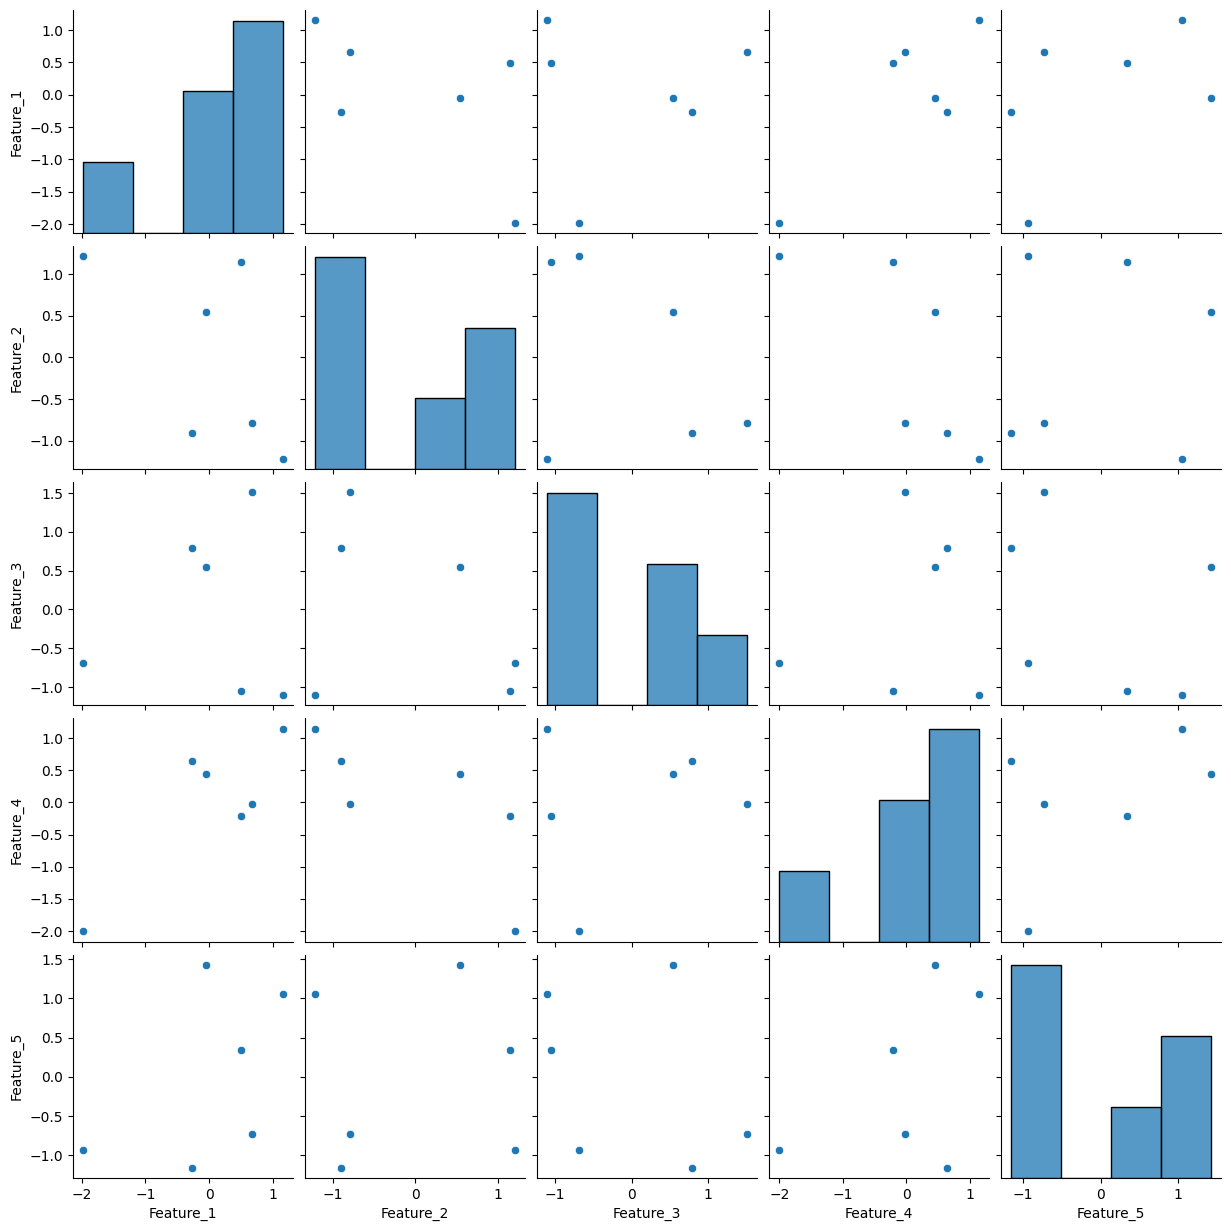

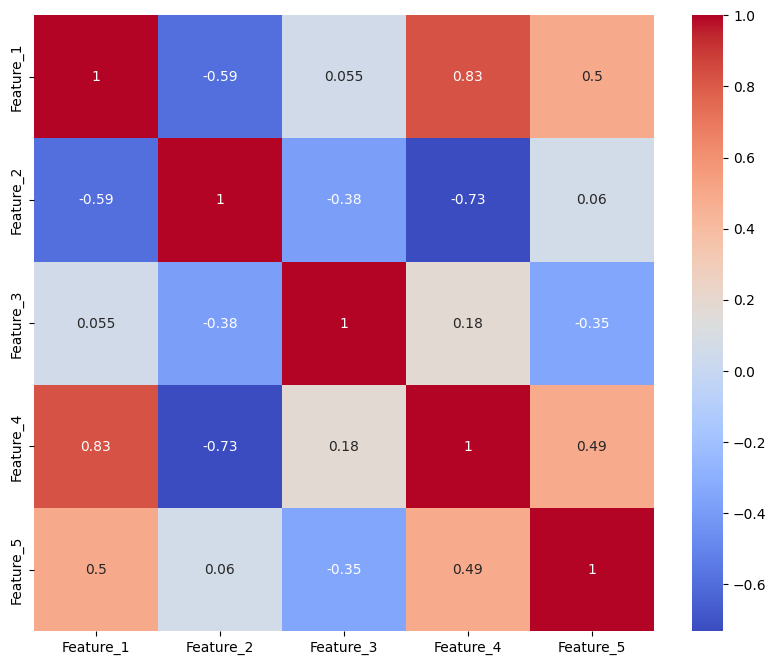

In [34]:
# Step 5: Exploratory Data Analysis (EDA)
sns.pairplot(data_scaled)
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(data_scaled.corr(), annot=True, cmap='coolwarm')
plt.show()




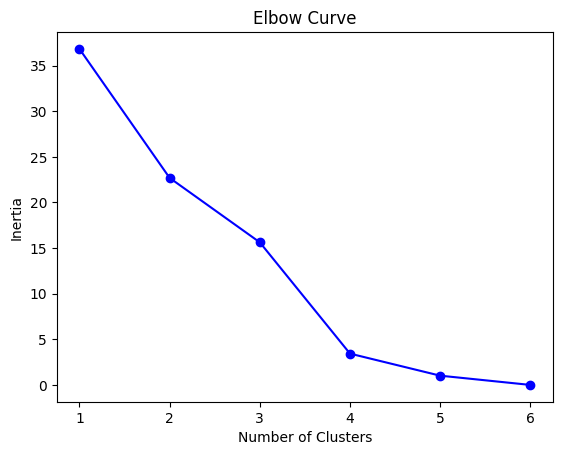

In [53]:
# Step 1: K-Means Clustering with Elbow Method
inertia = []
K = range(1, 7)  # Limit K to the number of data points (in this case, 6)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.show()



In [48]:
# Step 2: Hierarchical Clustering
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

hc = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
hc_labels = hc.fit_predict(data_scaled)

# Calculate Silhouette Score for Agglomerative Clustering
hc_silhouette = silhouette_score(data_scaled, hc_labels)
print("Silhouette Score for Hierarchical Clustering:", hc_silhouette)


Silhouette Score for Hierarchical Clustering: 0.2656261230571809


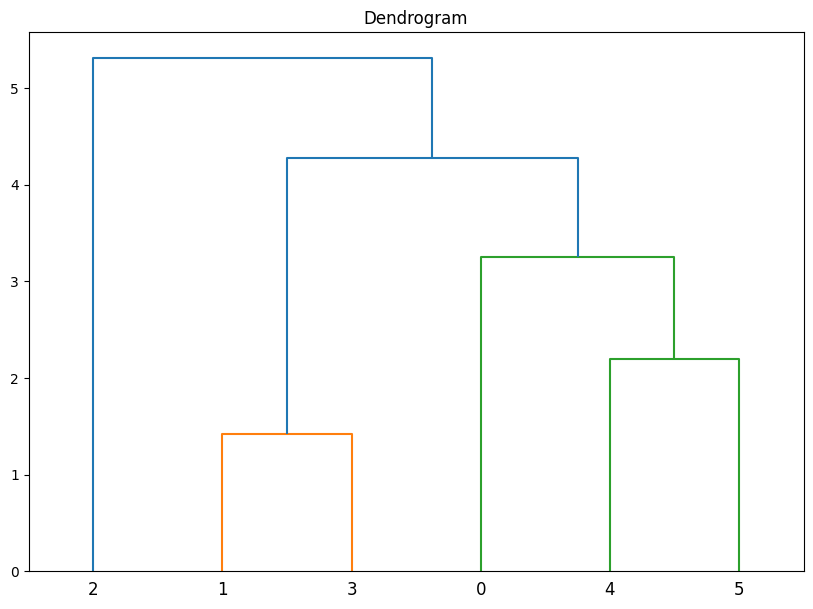

In [49]:
# Apply K-Means with optimal K (based on Elbow plot, let's assume 3)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(data_scaled)
kmeans_silhouette = silhouette_score(data_scaled, kmeans_labels)

# 2. Hierarchical Clustering and Dendrogram
linked = linkage(data_scaled, method='ward')

plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title('Dendrogram')
plt.show()

In [38]:
# 3. DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(data_scaled)

# Check if DBSCAN created clusters (excluding noise)
if len(set(dbscan_labels)) > 1:
    dbscan_silhouette = silhouette_score(data_scaled[dbscan_labels != -1], dbscan_labels[dbscan_labels != -1])
else:
    dbscan_silhouette = 'Not applicable - only noise points detected'



In [50]:
# Step 7: Cluster Analysis
data_scaled['KMeans_Cluster'] = kmeans_labels
data_scaled['HC_Cluster'] = hc_labels
data_scaled['DBSCAN_Cluster'] = dbscan_labels

# Print Silhouette Scores
print(f"K-Means Silhouette Score: {kmeans_silhouette}")
print(f"Hierarchical Clustering Silhouette Score: {hc_silhouette}")
print(f"DBSCAN Silhouette Score: {dbscan_silhouette}")



K-Means Silhouette Score: 0.11136230223539072
Hierarchical Clustering Silhouette Score: 0.2656261230571809
DBSCAN Silhouette Score: Not applicable - only noise points detected


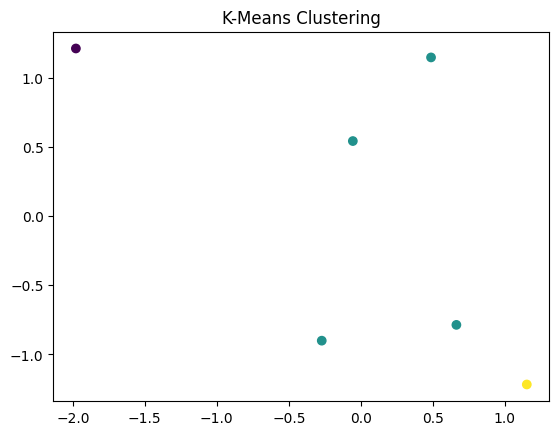

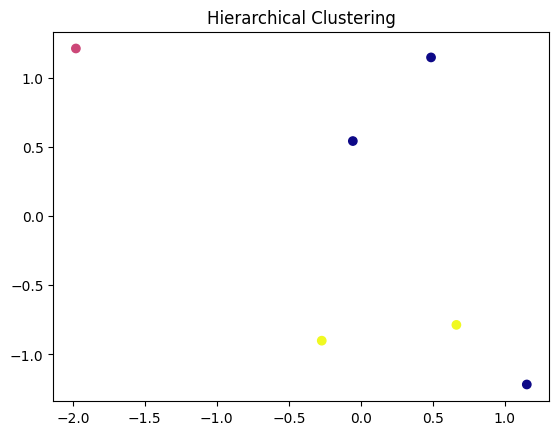

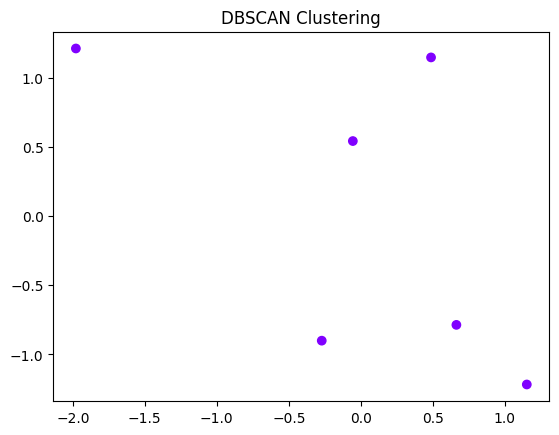

In [51]:
# Step 8: Visualizing the Clustering Results
plt.scatter(data_scaled.iloc[:, 0], data_scaled.iloc[:, 1], c=kmeans_labels, cmap='viridis')
plt.title('K-Means Clustering')
plt.show()

plt.scatter(data_scaled.iloc[:, 0], data_scaled.iloc[:, 1], c=hc_labels, cmap='plasma')
plt.title('Hierarchical Clustering')
plt.show()

plt.scatter(data_scaled.iloc[:, 0], data_scaled.iloc[:, 1], c=dbscan_labels, cmap='rainbow')
plt.title('DBSCAN Clustering')
plt.show()



In [54]:
# Step 9: Save the final cleaned dataset with cluster labels to CSV
# Save the file to the current directory
data_cleaned.to_csv('clustered_data.csv', index=False)
print("Clustered data saved to 'clustered_data.csv' in the current directory")


Clustered data saved to 'clustered_data.csv' in the current directory
